# **Introduction**

##### * **This project shows a Laptop price prediction system by using the supervised machine learning technique.**

##### * **Using random decision forest, there are multiple independent variables but one and only one dependent variable whose actual and predicted values are compared to find precision of results.**

##### * **This project proposes a system where price is dependent variable which is predicted, and this price is derived from factors like Laptop’s model, RAM, ROM (HDD/SSD), GPU, CPU, IPS Display, and Touch Screen.**

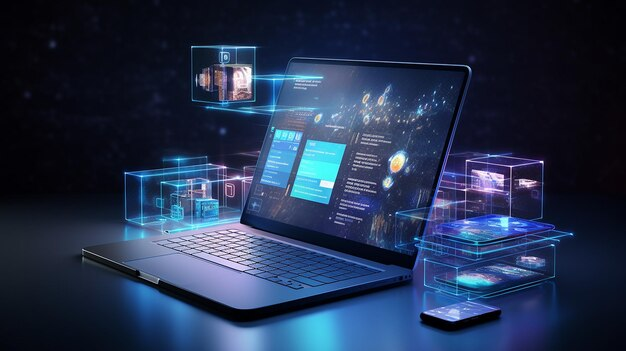

# **Importing Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

# **Loading the data**

In [7]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\laptop_data_cleaned.csv')


In [8]:
df

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Price,Price 1
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,11.175755,11.176
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,10.776777,10.777
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others,10.329931,10.330
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,11.814476,11.814
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,11.473101,11.473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows,10.555257,10.555
1269,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,10.433899,10.434
1270,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,11.288115,11.288
1271,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,9.409283,9.409


# **Data Cleaning**

#### **So we can see that there is column named "Price", which is a unnecessary data for this project. So we can safely drop the column from the dataset.**

In [11]:
df.drop(columns=['Price'],inplace=True)

In [12]:
df

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Price 1
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,11.176
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,10.777
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others,10.330
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,11.814
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,11.473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows,10.555
1269,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,10.434
1270,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,11.288
1271,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,9.409


In [13]:
df.head()

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Price 1
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,11.176
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,10.777
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others,10.330
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,11.814
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,11.473


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   TouchScreen  1273 non-null   int64  
 5   Ips          1273 non-null   int64  
 6   Ppi          1273 non-null   float64
 7   Cpu_brand    1273 non-null   object 
 8   HDD          1273 non-null   int64  
 9   SSD          1273 non-null   int64  
 10  Gpu_brand    1273 non-null   object 
 11  Os           1273 non-null   object 
 12  Price 1      1273 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [15]:
df.shape

(1273, 13)

In [16]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
Price 1        0
dtype: int64

### **We can observe that there is no null values in the dataset**

#### **Next, from the info we got from dataset, we can separate them as numrical values and categorical values to show the difference which features we will use for the analysis. Understanding this will help us in analysing the data more efficiently**

In [19]:
# Separating categorical and numerical values
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], dtype='object'),
 Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD', 'Price 1'], dtype='object'))

### **Now, we are trying to get info of all the columns of the datasets. And also to check how many number of values are present in each column**

In [21]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
# Calling uniquevals function
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Ram is : [ 8 16  4  2 12  6 32 24 64]
---------------------------------------------------------------------------
Details of the particular col Weight is : [1.37  1.34  1.86  1.83  2.1   2.04  1.3   1.6   2.2   0.92  1.22  0.98
 2.5   1.62  1.91  2.3   1.35  1.88  1.89  1.65  2.71  1.2   1.44  2.8
 2.    2.65  2.77  3.2   0.69  1.49  2.4   2.13  2.43  1.7   1.4   1.8
 1.9   3.    1.252 2.7   2.02  1.63  1.96  1.21  2.45  1.25  1.5   2.62
 1.38  1.58  1.85  1.23  1.26  2.16  2.36  2.05 

# **Outlier**

# **Checking for Outliers**

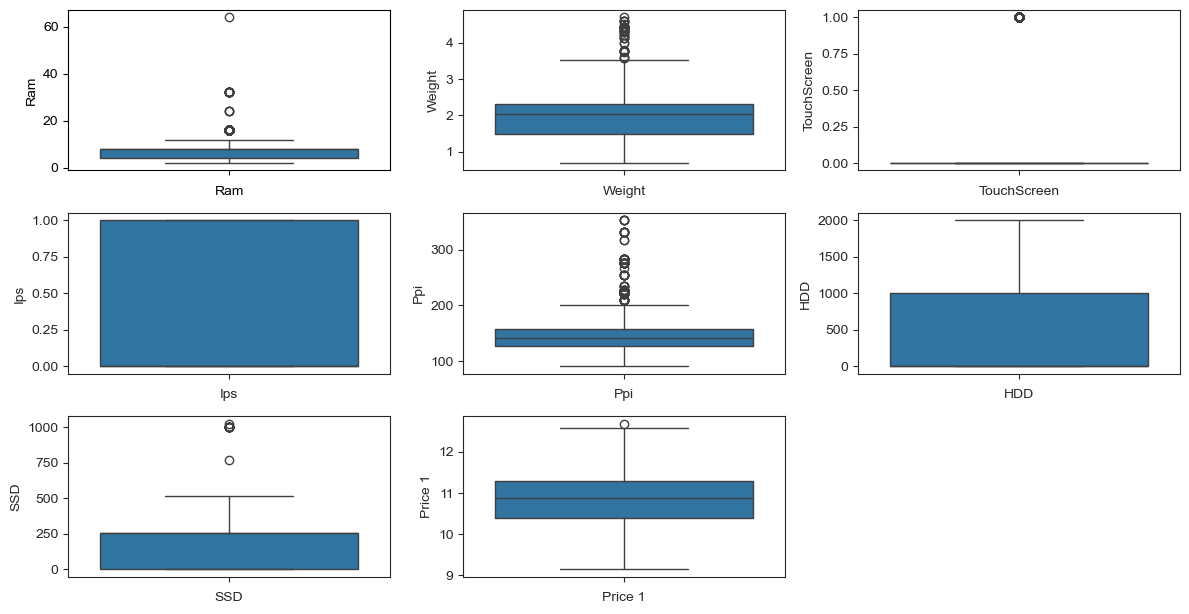

In [24]:
plt.figure(figsize=(12, 8))#(width , height)
for i,col in enumerate(numvars):
    plt.subplot(4, 3, i+1)#(4-rows,3-col)
    sns.set_style('ticks')
    ax = sns.boxplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()#spacing to prevent overlapping

# **Detecting Outlier and Capping it**

In [26]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)#Q1
    percentile75 = df[col].quantile(0.75)#Q3
    print('\n', col )
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25#(Q3-Q1)
    upper_limit = percentile75 + 1.5 * iqr#upper whisker
    lower_limit = percentile25 - 1.5 * iqr #lower whisker
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [27]:
for col in numvars:
         detect_outliers(col)#his function detects outliers using the IQR method.


 Ram
percentile25 4.0
percentile75 8.0
Upper limit 14.0
Lower limit -2.0

 Weight
percentile25 1.5
percentile75 2.31
Upper limit 3.5250000000000004
Lower limit 0.2849999999999999

 TouchScreen
percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0

 Ips
percentile25 0.0
percentile75 1.0
Upper limit 2.5
Lower limit -1.5

 Ppi
percentile25 127.3356746
percentile75 157.3505121
Upper limit 202.37276835
Lower limit 82.31341835

 HDD
percentile25 0.0
percentile75 1000.0
Upper limit 2500.0
Lower limit -1500.0

 SSD
percentile25 0.0
percentile75 256.0
Upper limit 640.0
Lower limit -384.0

 Price 1
percentile25 10.387
percentile75 11.287
Upper limit 12.637
Lower limit 9.036999999999999


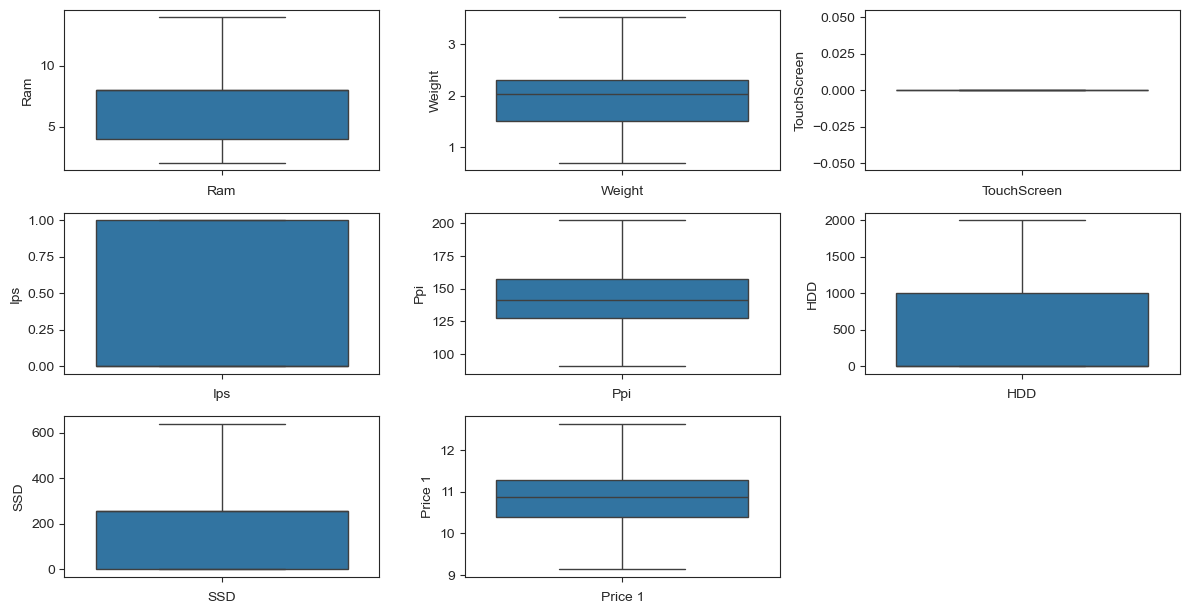

In [28]:
plt.figure(figsize=(12, 8))
for i,col in enumerate(numvars):
    plt.subplot(4, 3, i+1)
    sns.set_style('ticks')
    ax = sns.boxplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()

# **Checking Skewness**

In [30]:
from scipy.stats import skew # thise function are used to calculate skewness

In [31]:
# df[continuous_features].skew(axis=0)
print(skew(df[numvars]))

[ 0.57856574  0.47753481         nan  0.9818682   0.45751224  0.89250777
  0.67286136 -0.18129225]


Ram : 0.578565738867561
Weight : 0.477534812722911
TouchScreen : nan
Ips : 0.9818681994990752
Ppi : 0.4575122402035156
HDD : 0.8925077737041733
SSD : 0.6728613613993923
Price 1 : -0.18129224605934036


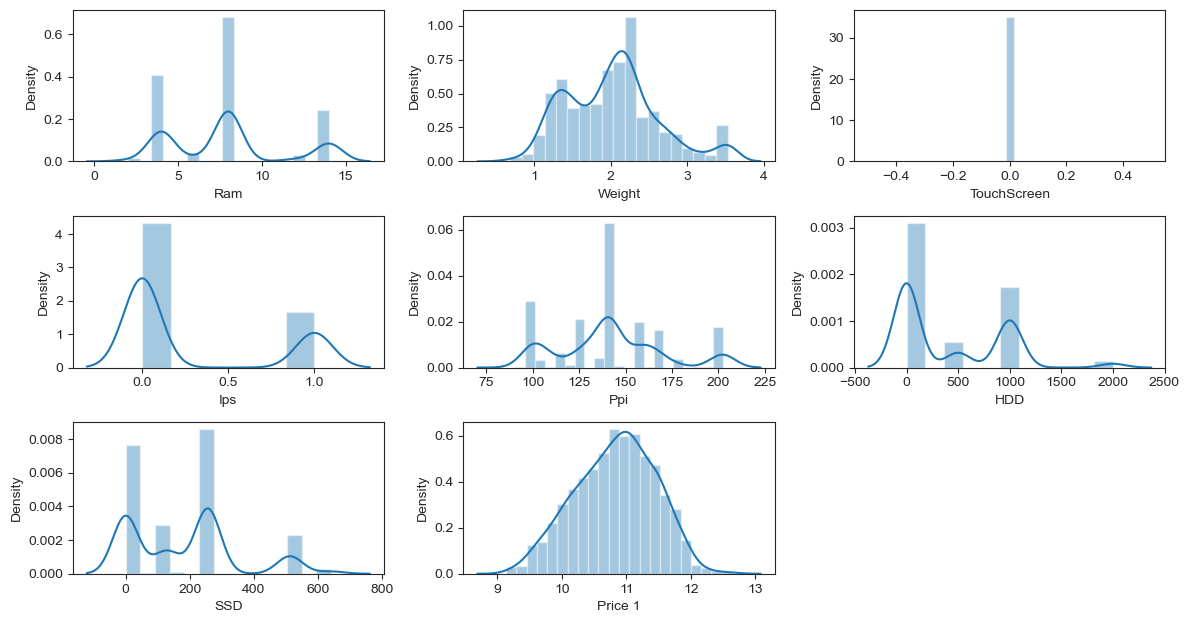

In [32]:
plt.figure(figsize=(12, 8))
for i,col in enumerate(numvars):
    print(col,': ',end='')
    print(skew(df[col]))
    plt.subplot(4, 3, i+1)
    sns.distplot(df[col],hist=True)
    plt.xlabel(col)
    plt.tight_layout()#space between subplot
    # plt.show()

# **Exploratory Data Analysis**

# **Price Distribution plot**

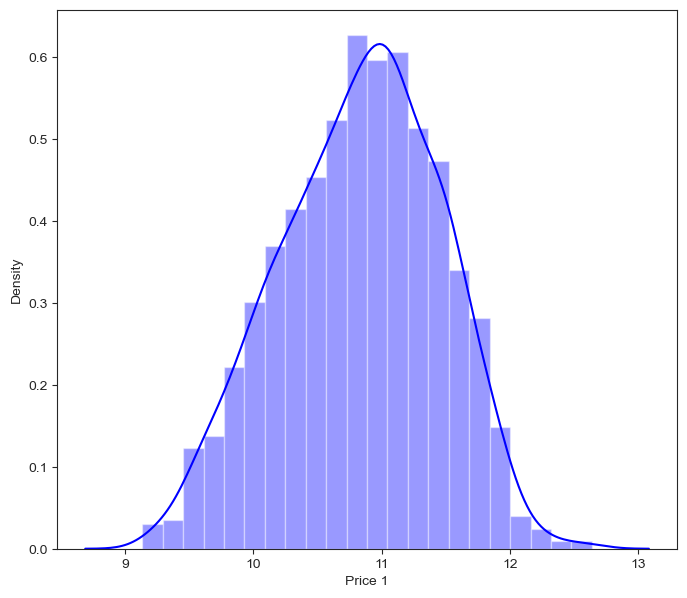

In [35]:
plt.figure(figsize=(8,7))
sns.distplot(df['Price 1'],color='blue')
plt.show()

# **Countplot for Categorical variables**

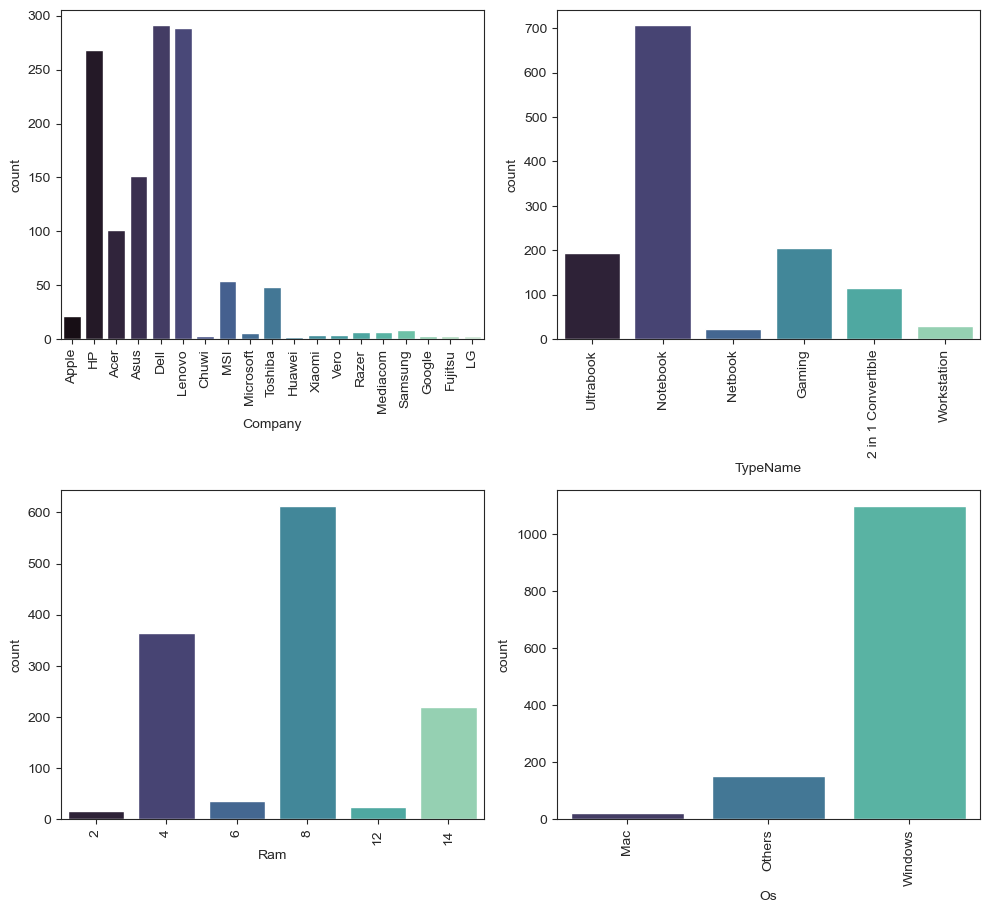

In [37]:
plt.figure(figsize=(10, 18)) #width, height
cat1 = [ 'Company', 'TypeName','Ram','Os']
for i in range(0, len(cat1)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[cat1[i]],palette='mako')
    plt.xlabel(cat1[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

# **Barplot - Average price for each Laptop brands**

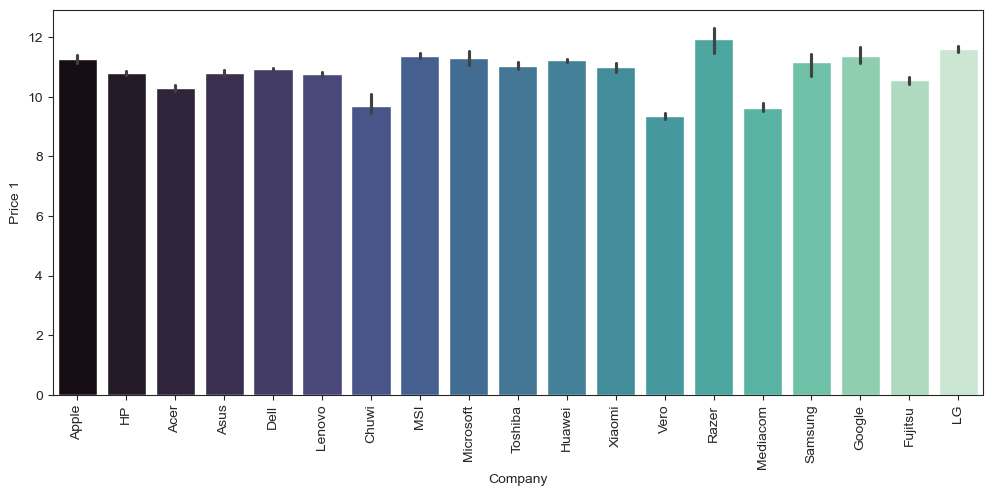

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(x = df['Company'],y = df['Price 1'],palette='mako')
plt.xticks(rotation = 'vertical')
plt.show()

### **Razer, Apple, LG, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.**

# **Countplot for Laptop types**

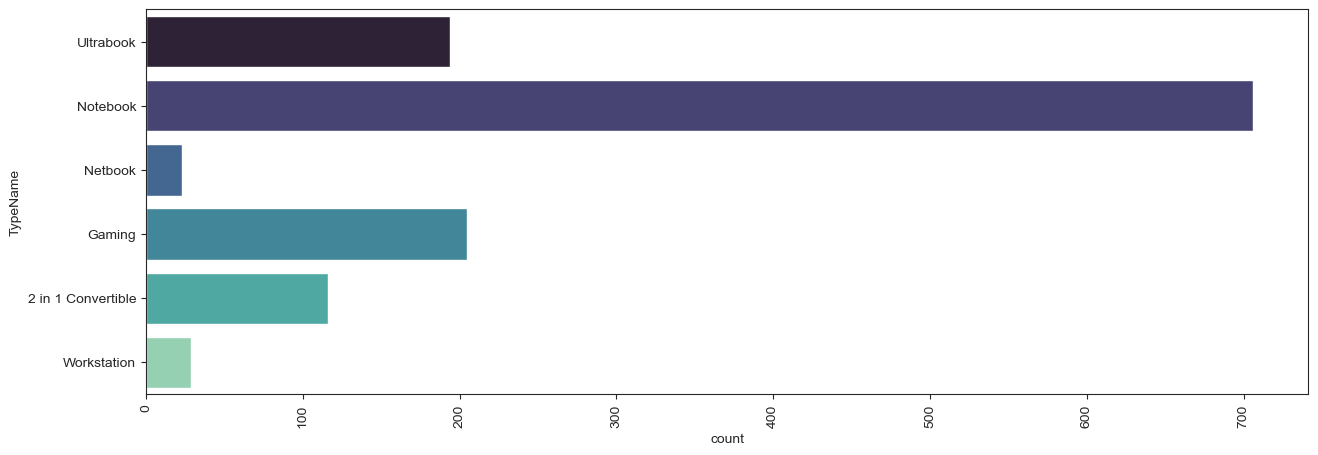

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df['TypeName'],palette='mako')
plt.xticks(rotation = 'vertical')
plt.show()

# **Barplot - Price variation on each Laptop type**

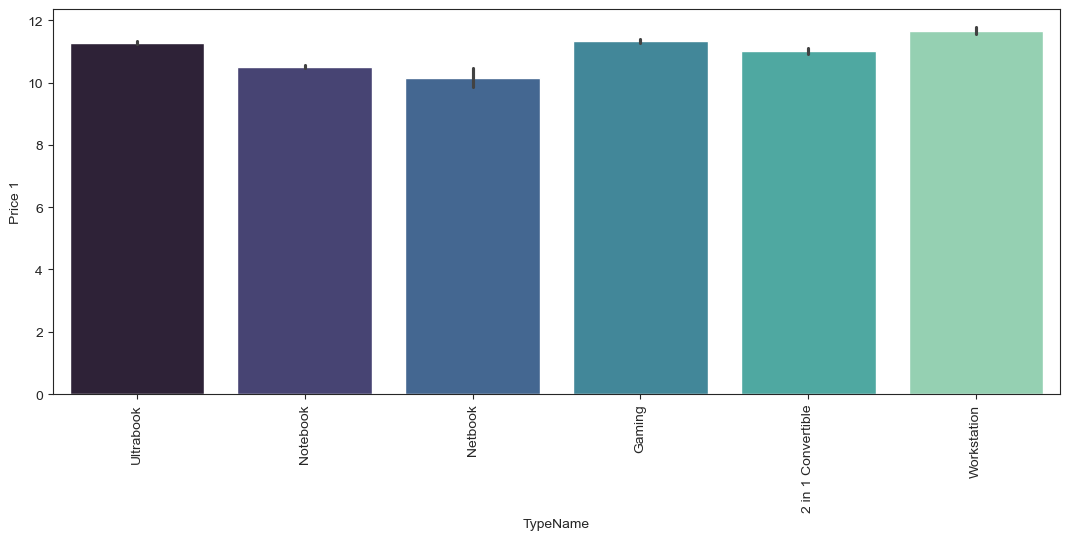

In [44]:
plt.figure(figsize=(13,5))
sns.barplot(x = df['TypeName'],y = df['Price 1'],palette='mako')
plt.xticks(rotation = 'vertical')
plt.show()

# **Scatterplot - Price variation for different inches of laptops**

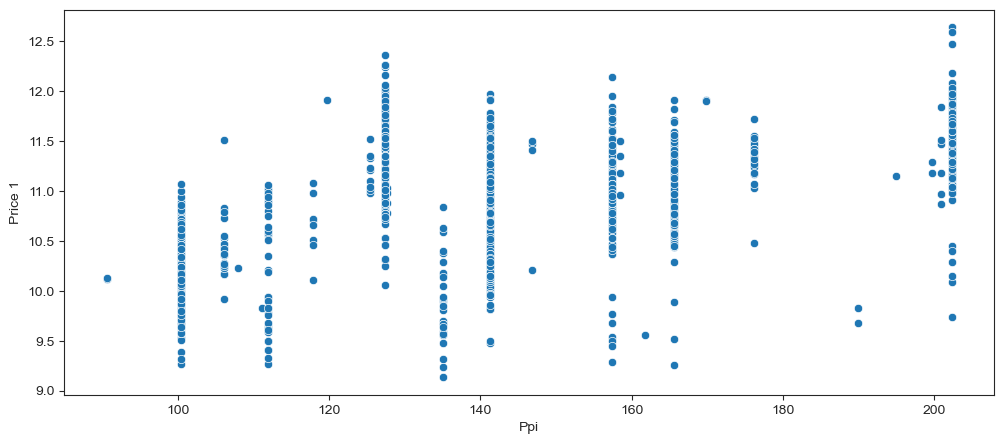

In [46]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = df['Ppi'],y = df['Price 1'],palette='mako')
plt.show()

# **CPU Distridution**

In [48]:
df['Cpu_brand'].value_counts()

Cpu_brand
Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64

# **Countplot for number of CPUs**

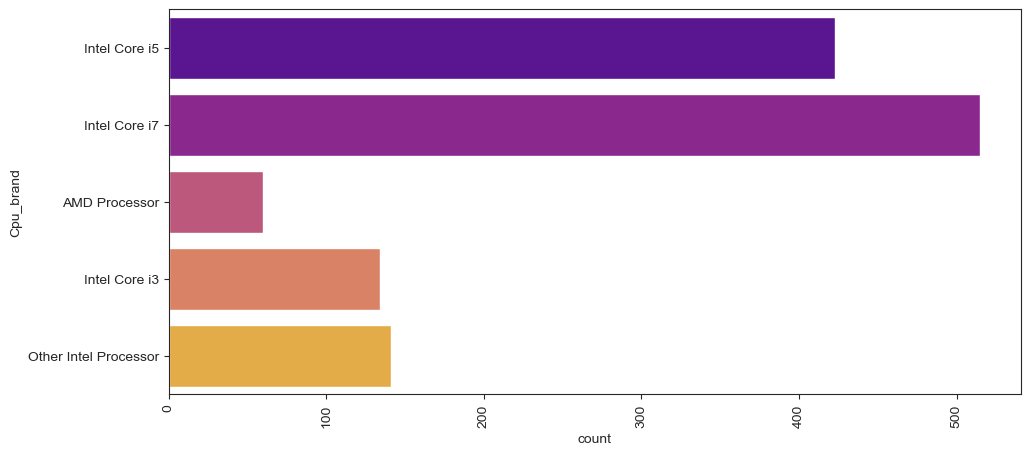

In [50]:
plt.figure(figsize=(11,5))
sns.countplot(df['Cpu_brand'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

# **Price vs CPU variation**

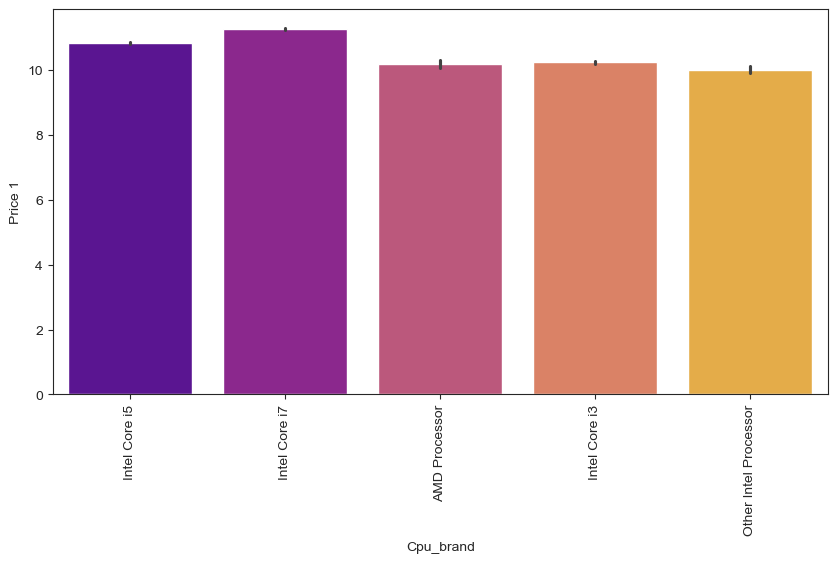

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Cpu_brand'],y=df['Price 1'],data=df,palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

### **We can safely drop the old CPU column from the dataset**

In [54]:
df.drop(columns=['Cpu_brand'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD,Gpu_brand,Os,Price 1
0,Apple,Ultrabook,8,1.37,0,1.0,202.372768,0,128,Intel,Mac,11.176
1,Apple,Ultrabook,8,1.34,0,0.0,127.677940,0,0,Intel,Mac,10.777
2,HP,Notebook,8,1.86,0,0.0,141.211998,0,256,Intel,Others,10.330
3,Apple,Ultrabook,14,1.83,0,1.0,202.372768,0,512,AMD,Mac,11.814
4,Apple,Ultrabook,8,1.37,0,1.0,202.372768,0,256,Intel,Mac,11.473


# **Analysis on the RAM column**

In [56]:
Ram_counts = df['Ram'].value_counts()
print(f"The Number of Ram:{len(Ram_counts)}")

The Number of Ram:6


# **Barplot - Price vs RAM**

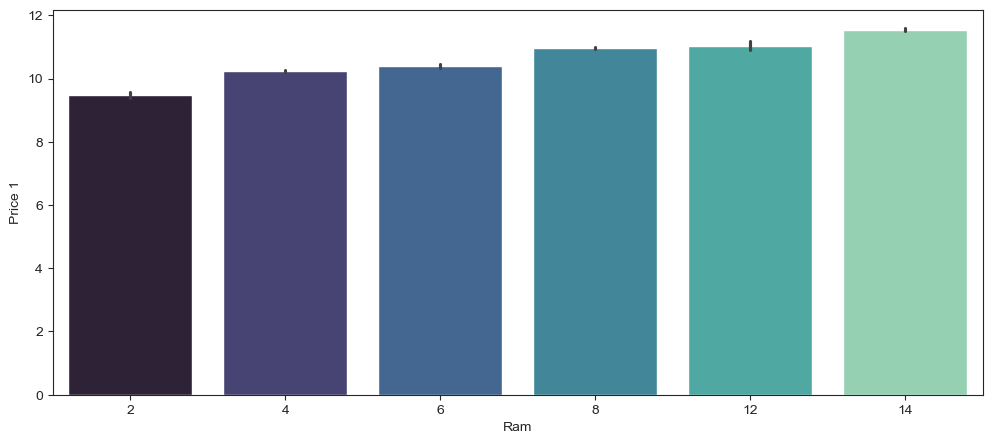

In [58]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Ram'],y=df['Price 1'],data=df,palette='mako')
plt.show()

# **Analysis on GPU**

In [60]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

# **Extracting the GPU brands**

In [62]:
a = df['Gpu_brand'].iloc[1]
print(a.split()[0])

Intel


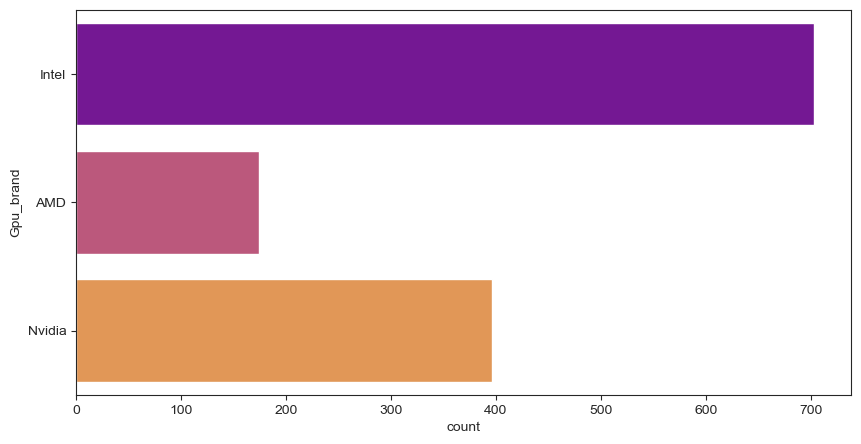

In [63]:
plt.figure(figsize=(10,5))
df['Gpu_brand'] = df['Gpu_brand'].apply(lambda x:x.split()[0])
sns.countplot(df['Gpu_brand'],palette='plasma')
plt.show()

# **Operating System analysis**

<Axes: ylabel='count'>

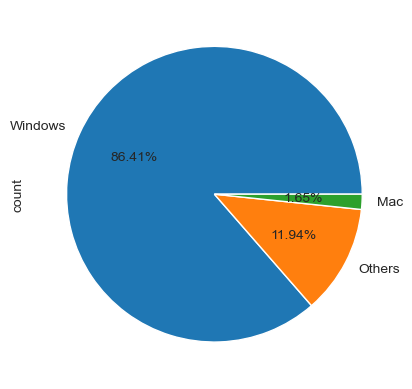

In [65]:
df['Os'].value_counts().plot(kind='pie',autopct = '%0.2f%%')

# **Barplot - Price variation on OS in laptops**

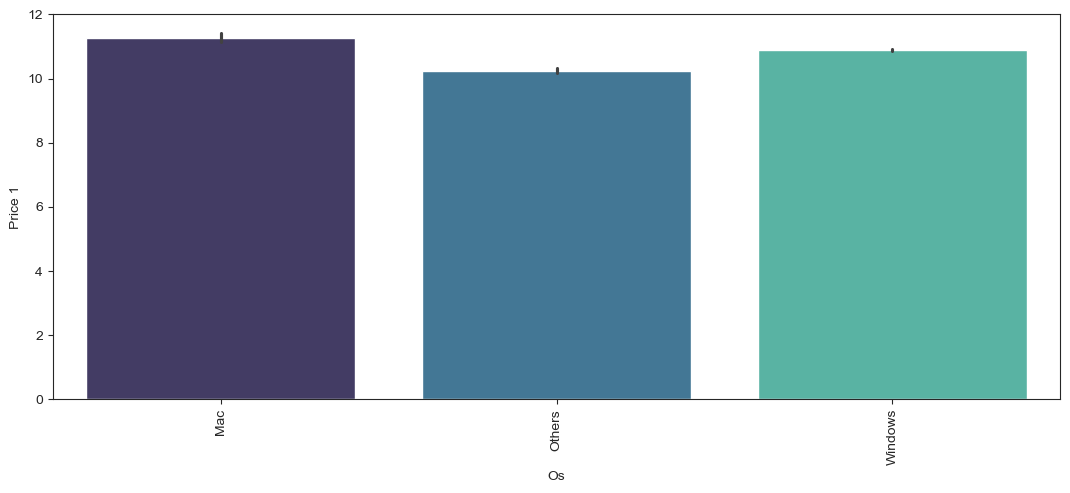

In [67]:
plt.figure(figsize=(13,5))
sns.barplot(x=df['Os'],y=df['Price 1'],data=df,palette='mako')
plt.xticks(rotation = 'vertical')
plt.show()

#  **Weight analysis**

### **Distribution plot on weight column**

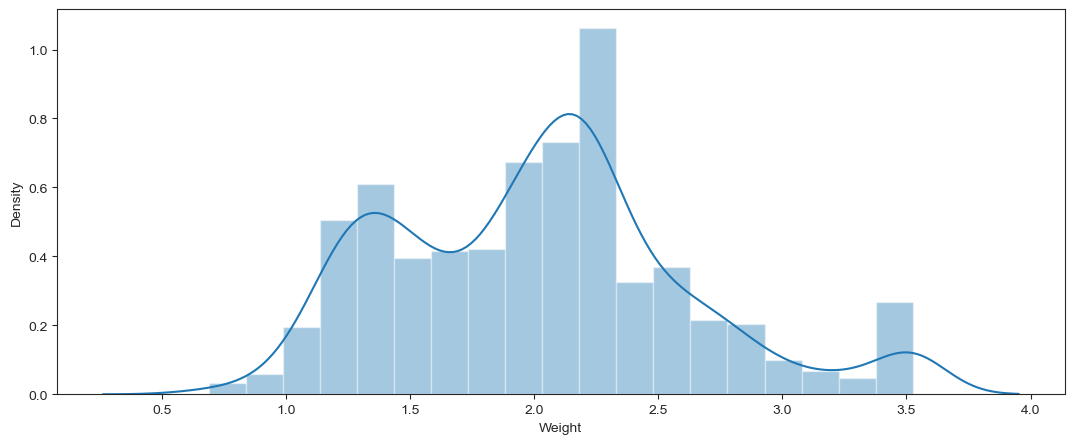

In [70]:
plt.figure(figsize=(13,5))
sns.distplot(df['Weight'])
plt.show()


### **Scatterplot - Price variation on weight**

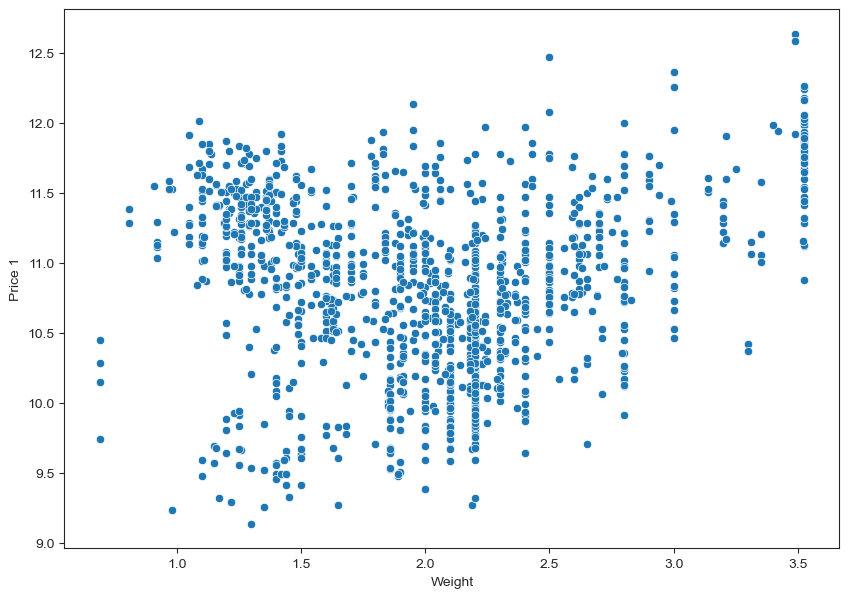

In [72]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Weight'],y=df['Price 1'],data=df)
plt.show()

# **Company**

In [74]:
counts_of_Company = df['Company'].value_counts()
print(f"The Number of Company: {len(counts_of_Company)}")

The Number of Company: 19


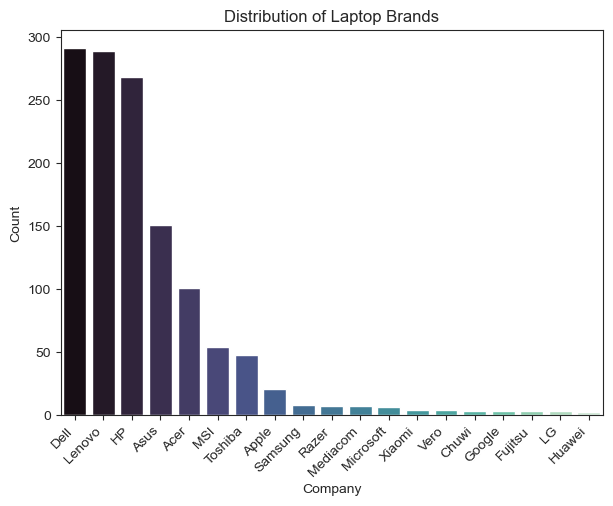

In [75]:
import matplotlib.pyplot as plt

company_counts = df['Company'].value_counts()

plt.figure(figsize =(7,5))
sns.barplot(x= company_counts.index, y = company_counts.values,palette='mako')
plt.title('Distribution of Laptop Brands')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

# **Heatmap - Correlation between all features**

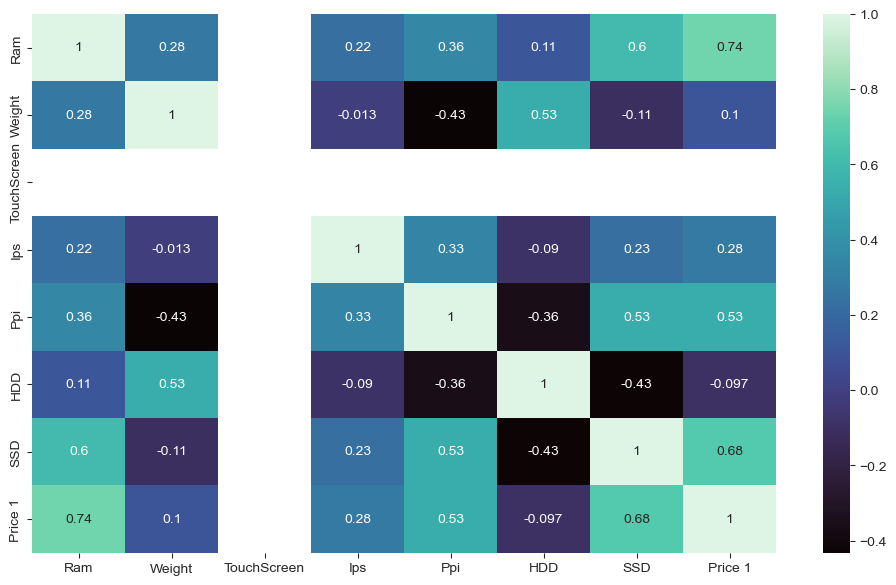

In [77]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True,cmap='mako')
plt.show()

In [78]:
df.drop(columns=['TouchScreen'],inplace=True)
df.drop(columns=['Os'],inplace=True)


In [79]:
df

,Company,TypeName,Ram,Weight,Ips,Ppi,HDD,SSD,Gpu_brand,Price 1
0,Apple,Ultrabook,8,1.37,1.0,202.372768,0,128,Intel,11.176
1,Apple,Ultrabook,8,1.34,0.0,127.677940,0,0,Intel,10.777
2,HP,Notebook,8,1.86,0.0,141.211998,0,256,Intel,10.330
3,Apple,Ultrabook,14,1.83,1.0,202.372768,0,512,AMD,11.814
4,Apple,Ultrabook,8,1.37,1.0,202.372768,0,256,Intel,11.473
...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,0.0,100.454670,500,0,Nvidia,10.555
1269,Lenovo,2 in 1 Convertible,4,1.80,1.0,157.350512,0,128,Intel,10.434
1270,Lenovo,2 in 1 Convertible,14,1.30,1.0,202.372768,0,512,Intel,11.288
1271,Lenovo,Notebook,2,1.50,0.0,111.935204,0,0,Intel,9.409


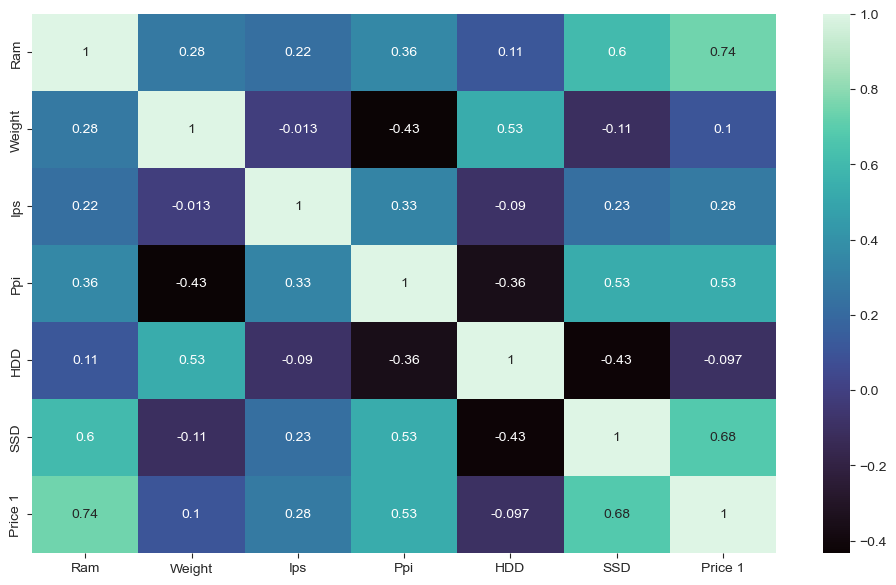

In [80]:
plt.figure(figsize=(12,7))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(),annot=True,cmap='mako')
plt.show()

### **Encoding**

In [82]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
categorical_cols = ['Company', 'TypeName','Gpu_brand']
df[categorical_cols]=oe.fit_transform(df[categorical_cols])

print(df)

      Company  TypeName  Ram  Weight  Ips         Ppi   HDD  SSD  Gpu_brand  \
0         1.0       4.0    8    1.37  1.0  202.372768     0  128        1.0   
1         1.0       4.0    8    1.34  0.0  127.677940     0    0        1.0   
2         7.0       3.0    8    1.86  0.0  141.211998     0  256        1.0   
3         1.0       4.0   14    1.83  1.0  202.372768     0  512        0.0   
4         1.0       4.0    8    1.37  1.0  202.372768     0  256        1.0   
...       ...       ...  ...     ...  ...         ...   ...  ...        ...   
1268      2.0       3.0    4    2.20  0.0  100.454670   500    0        2.0   
1269     10.0       0.0    4    1.80  1.0  157.350512     0  128        1.0   
1270     10.0       0.0   14    1.30  1.0  202.372768     0  512        1.0   
1271     10.0       3.0    2    1.50  0.0  111.935204     0    0        1.0   
1272      7.0       3.0    6    2.19  0.0  100.454670  1000    0        0.0   

      Price 1  
0      11.176  
1      10.777  
2  

# **Model Building**

# **Train Test Split**

In [85]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [86]:
x

,Company,TypeName,Ram,Weight,Ips,Ppi,HDD,SSD,Gpu_brand
0,1.0,4.0,8,1.37,1.0,202.372768,0,128,1.0
1,1.0,4.0,8,1.34,0.0,127.677940,0,0,1.0
2,7.0,3.0,8,1.86,0.0,141.211998,0,256,1.0
3,1.0,4.0,14,1.83,1.0,202.372768,0,512,0.0
4,1.0,4.0,8,1.37,1.0,202.372768,0,256,1.0
...,...,...,...,...,...,...,...,...,...
1268,2.0,3.0,4,2.20,0.0,100.454670,500,0,2.0
1269,10.0,0.0,4,1.80,1.0,157.350512,0,128,1.0
1270,10.0,0.0,14,1.30,1.0,202.372768,0,512,1.0
1271,10.0,3.0,2,1.50,0.0,111.935204,0,0,1.0


In [87]:
y

0       11.176
1       10.777
2       10.330
3       11.814
4       11.473
         ...  
1268    10.555
1269    10.434
1270    11.288
1271     9.409
1272    10.614
Name: Price 1, Length: 1273, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

x_train.shape,x_test.shape

((1082, 9), (191, 9))

#  **All Algorithum**

In [92]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [93]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [94]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [95]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
    
    
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3408
- Mean Absolute Error: 0.2707
- R2 Score: 0.6993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3464
- Mean Absolute Error: 0.2813
- R2 Score: 0.6737


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4183
- Mean Absolute Error: 0.3336
- R2 Score: 0.5469
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3776
- Mean Absolute Error: 0.2999
- R2 Score: 0.6122


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3408
- Mean Absolute Error: 0.2707
- R2 Score: 0.6993
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3463
- Mean Absolute Error: 0.2813
- R2 Score: 0.6738


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2568
- Mean Absolute Error: 0.1923
- R2 Score: 0.8292
-----------------------

In [155]:
from colorama import Fore, Back, Style
print("Linear Regression MSE:" + Fore.CYAN + str(mse) + Style.RESET_ALL)
print("Decision Tree Regression MSE:" + Fore.RED + str(mse) + Style.RESET_ALL)
print("Random Forest Regression MSE:" + Fore.GREEN + str(mse) + Style.RESET_ALL)


NameError: name 'mse' is not defined